In [ ]:
### MLP modeling

In [16]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [17]:
# read dataset
# df = pd.read_csv(r'C:\Users\xuhu\OneDrive - ANSYS, Inc\Desktop\Temp\ROM_ECG_150\dataset_150.csv')
df = pd.read_csv(r'D:\xuhu\pyansys-heart\downloads\Strocchi2020\01\Biv_dataset\dataset_40_220.csv')
df.shape

(129, 3)

In [18]:
X = df['LeadII'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
X = np.stack(X, axis=0)

Y = df[['sigmaX', 'ratio2']].values
print(X.shape, Y.shape)

(129, 799) (129, 2)


In [19]:
import keras.backend as K

def mean_relative_error(y_true, y_pred):
    return K.mean(K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None)))


In [20]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(50, activation='relu'))
model.add(Dense(2))

model.compile(loss=mean_relative_error, optimizer='adam', metrics=[mean_relative_error])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                51200     
                                                                 
 dense_4 (Dense)             (None, 50)                3250      
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 54552 (213.09 KB)
Trainable params: 54552 (213.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(X, Y, epochs=500, validation_split=0.1)

Epoch 1/500
4/4 [==============================] - 1s 68ms/step - loss: 0.9928 - mean_relative_error: 0.9878 - val_loss: 0.9187 - val_mean_relative_error: 0.9187
Epoch 2/500
4/4 [==============================] - 0s 17ms/step - loss: 0.8777 - mean_relative_error: 0.8731 - val_loss: 0.8087 - val_mean_relative_error: 0.8087
Epoch 3/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7518 - mean_relative_error: 0.7459 - val_loss: 0.6713 - val_mean_relative_error: 0.6713
Epoch 4/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6361 - mean_relative_error: 0.6314 - val_loss: 0.5624 - val_mean_relative_error: 0.5624
Epoch 5/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5882 - mean_relative_error: 0.5903 - val_loss: 0.5440 - val_mean_relative_error: 0.5440
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 0.5670 - mean_relative_error: 0.5676 - val_loss: 0.5277 - val_mean_relative_error: 0.5277
Epoch 7/500
4/4 [===========

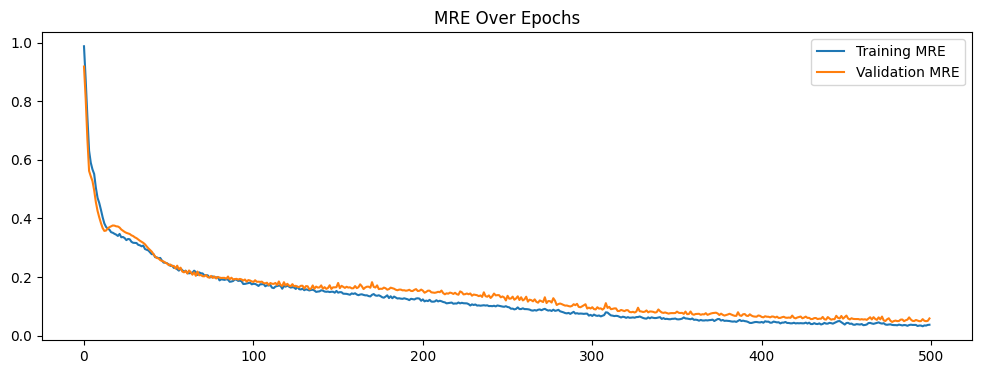

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.plot(history.history['mean_relative_error'], label='Training MRE')
plt.plot(history.history['val_mean_relative_error'], label='Validation MRE')
plt.title('MRE Over Epochs')
plt.legend()

plt.show()

In [15]:
test_loss, test_mre = model.evaluate(X, Y, verbose=2)
print("Test Loss:", test_loss)
print("Test MRE:", test_mre)

4/4 - 0s - loss: 0.0488 - mean_relative_error: 0.0649 - 29ms/epoch - 7ms/step
Test Loss: 0.04875057935714722
Test MRE: 0.06492017954587936


In [ ]:
# # Complete Code
# import pandas as pd
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Dense, Flatten

# df = pd.read_csv(r'D:\xuhu\pyansys-heart\downloads\Strocchi2020\01\Biv_dataset\dataset_40_220.csv')

# X = df['LeadII'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))
# X = np.stack(X, axis=0)

# Y = df[['sigmaX', 'ratio2']].values

# import keras.backend as K

# def mean_relative_error(y_true, y_pred):
#     return K.mean(K.abs((y_true - y_pred) / K.clip(K.abs(y_true), K.epsilon(), None)))

# model = Sequential()

# model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(2))

# model.compile(loss=mean_relative_error, optimizer='adam', metrics=[mean_relative_error])


# history = model.fit(X, Y, epochs=500, validation_split=0.1)

# test_loss, test_mre = model.evaluate(X, Y, verbose=2)

In [25]:
# history_data = history.history

# df_history = pd.DataFrame(history_data)

# df_mre = df_history[['mean_relative_error', 'val_mean_relative_error']]
# df_mre.to_csv(r'D:\xuhu\Temp\AI method\MLP_mre_history.csv', index=False)


In [26]:
def sample_mean_relative_error(y_true, y_pred):
    mre = np.abs((y_true - y_pred) / np.clip(np.abs(y_true), np.finfo(float).eps, None))
    # print(mre[0],mre[1])
    # print(len(mre))
    return mre[0]

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_test

array([[ 3.26861870e-03,  1.46829619e-03,  1.29950707e-03, ...,
         1.75538130e-04,  1.78982674e-04,  1.74484981e-04],
       [ 3.76362610e-03,  1.68999465e-03,  1.45425429e-03, ...,
         2.24324070e-04,  2.28647280e-04,  2.23263400e-04],
       [-4.66239920e-04, -3.93062890e-04, -6.07460000e-07, ...,
        -2.50759860e-04, -2.48686220e-04, -2.51347740e-04],
       ...,
       [ 1.26622683e-03,  5.50153980e-04,  6.74861790e-04, ...,
        -4.34041460e-05, -4.03783356e-05, -4.41278947e-05],
       [ 4.39182183e-05, -9.88883410e-05,  2.14565150e-04, ...,
        -1.70688693e-04, -1.68874311e-04, -1.71562994e-04],
       [ 2.19438237e-03,  1.00213160e-03,  9.89071400e-04, ...,
         5.40100620e-05,  5.84398700e-05,  5.32829640e-05]])

In [36]:
y_test

array([[1.20089313, 2.22713743],
       [1.31799678, 3.72625519],
       [0.317339  , 8.12840139],
       [0.91247952, 8.26767796],
       [0.45193543, 7.10342079],
       [0.51612953, 4.99616897],
       [1.6619951 , 4.20074448],
       [1.6660925 , 6.34374621],
       [0.56749892, 9.82504387],
       [1.34797435, 9.4234064 ],
       [0.72718801, 6.54332519],
       [0.43802692, 1.92598458],
       [0.94676142, 6.96522613]])

In [37]:
import pandas as pd
import numpy as np

mlp_predictions = model.predict(X_test)

mlp_mres = [sample_mean_relative_error(y_test[i], mlp_predictions[i]) for i in range(len(y_test))]

df_mlp_mre = pd.DataFrame(mlp_mres, columns=['MRE'])

df_mlp_mre.to_csv(r'D:\xuhu\Temp\AI method\mlp_mre_pred.csv', index=False)


1/1 [==============================] - 0s 25ms/step


In [43]:
def read_binary(fn , debug = False):

    '''
    Reads a vector in ANSYS ROM Builder compatible binary format and returns the corresponding vector.
    '''

    fr = open(fn, "rb")
    nb = struct.unpack('Q', fr.read(8))[0]
    
    if debug:
        print("Read binary file containing " + str(nb) + " values.")
        
    vec = np.zeros(nb)
    
    for i in range(nb):
        vec[i] = struct.unpack('d', fr.read(8))[0]
        
    fr.close()
    
    return vec

import pandas as pd
import numpy as np
import struct

file_name = r'D:\xuhu\Temp\ROM_ECG_TRAIN_1601\roms\w_2501.bin'
# print(full_path)
ROM_result = read_binary(file_name)
print(ROM_result)

[ 9.69934486e-04  3.74981826e-04  5.40417295e-04  5.48314879e-04
  4.97671111e-04  5.79928626e-04  6.26457503e-04  7.55142080e-04
  1.51056549e-03  1.03585607e-03  1.07030485e-03  1.19608937e-03
  1.28394064e-03  1.59190835e-03  1.66857501e-03  1.67839153e-03
  1.60532280e-03  9.31022470e-04  8.84071683e-04 -9.53690983e-04
 -1.01036113e-03 -2.63211518e-03 -2.82397913e-03 -3.86727142e-03
 -3.81828732e-03 -4.67698885e-03 -4.65993265e-03 -8.30419265e-03
 -7.81865472e-03 -1.04130832e-02 -1.00680642e-02 -1.21413192e-02
 -1.16914379e-02 -1.27203367e-02 -1.29478830e-02 -1.39785562e-02
 -1.37323348e-02 -1.56751244e-02 -1.54227564e-02 -1.61184960e-02
 -1.60721511e-02 -1.58220188e-02 -1.59138768e-02 -1.68635415e-02
 -1.71677772e-02 -1.80646810e-02 -1.81679238e-02 -1.90717383e-02
 -1.94655882e-02 -1.92439409e-02 -1.96051490e-02 -2.00903301e-02
 -2.04286006e-02 -2.11378362e-02 -2.14451755e-02 -2.27844393e-02
 -2.27908717e-02 -2.38804494e-02 -2.37757658e-02 -2.39312175e-02
 -2.41941567e-02 -2.45681

In [44]:
import pandas as pd
import numpy as np

file_name = r'D:\xuhu\Temp\ROM_ECG_TRAIN_1601\roms\w_2501.bin'
# print(full_path)
ROM_result = read_binary(file_name)
ROM_result = np.expand_dims(ROM_result, axis=0)

In [45]:
X.shape

(129, 799)

In [46]:
ROM_result.shape

(1, 799)

In [47]:
ROM_Y = model.predict(ROM_result)
ROM_Y

1/1 [==============================] - 0s 33ms/step


array([[0.6212901, 6.7544446]], dtype=float32)